In [ ]:
pip install scikit-learn

Descomprimir archivos zip con las categorías

In [ ]:
from google.colab import files
import zipfile
import os

destino = '/content/categorias/'
os.makedirs(destino, exist_ok=True)
uploaded = files.upload()

for filename in uploaded.keys():
    if filename.endswith('.zip'):
        with zipfile.ZipFile(filename, 'r') as zip_ref:
            zip_ref.extractall()
        print(f"Carpeta '{filename}' descomprimida.")
    else:
        print(f"Archivo '{filename}' subido (no es un zip).")


Saving trompaleolum_completa-20250430T172701Z-1-001.zip to trompaleolum_completa-20250430T172701Z-1-001.zip
Saving rosa_foetida-20250430T033944Z-1-001.zip to rosa_foetida-20250430T033944Z-1-001.zip
Saving alheli-20250430T033937Z-1-001.zip to alheli-20250430T033937Z-1-001.zip
Saving nymphaea-20250430T033940Z-1-001.zip to nymphaea-20250430T033940Z-1-001.zip
Saving pasiflora_completa-20250430T033822Z-1-001.zip to pasiflora_completa-20250430T033822Z-1-001.zip
Saving petunia_completa-20250430T033825Z-1-001.zip to petunia_completa-20250430T033825Z-1-001.zip
Carpeta 'trompaleolum_completa-20250430T172701Z-1-001.zip' descomprimida.
Carpeta 'rosa_foetida-20250430T033944Z-1-001.zip' descomprimida.
Carpeta 'alheli-20250430T033937Z-1-001.zip' descomprimida.
Carpeta 'nymphaea-20250430T033940Z-1-001.zip' descomprimida.
Carpeta 'pasiflora_completa-20250430T033822Z-1-001.zip' descomprimida.
Carpeta 'petunia_completa-20250430T033825Z-1-001.zip' descomprimida.


Código para la división de los datos de entrenamiento(entrenamiento y validación ) y prueba

In [2]:
import os
import random
import shutil
from math import floor


original_dir = "/content/categorias/"
base_dir = "/content/categorias_dividido/"
train_dir = os.path.join(base_dir, "train")
val_dir = os.path.join(base_dir, "val")
test_dir = os.path.join(base_dir, "test")

#creación de los directorios base
for split_dir in [train_dir, val_dir, test_dir]:
    os.makedirs(split_dir, exist_ok=True)

#semilla para reproducibilidad
random.seed(123)

for class_name in os.listdir(original_dir):
    class_path = os.path.join(original_dir, class_name)
    if not os.path.isdir(class_path):
        continue

    #creación subcarpetas de clase
    for split_dir in [train_dir, val_dir, test_dir]:
        os.makedirs(os.path.join(split_dir, class_name), exist_ok=True)

    #listar imágenes y mezclar
    images = os.listdir(class_path)
    random.shuffle(images)

    total = len(images)
    test_size = floor(0.20 * total)
    train_val_size = total - test_size
    val_size = floor(0.20 * train_val_size)
    train_size = train_val_size - val_size

    #división de los datos
    train_images = images[:train_size]
    val_images = images[train_size:train_size + val_size]
    test_images = images[train_size + val_size:]

    #copiar archivos
    for img_name in train_images:
        shutil.copy(os.path.join(class_path, img_name), os.path.join(train_dir, class_name, img_name))
    for img_name in val_images:
        shutil.copy(os.path.join(class_path, img_name), os.path.join(val_dir, class_name, img_name))
    for img_name in test_images:
        shutil.copy(os.path.join(class_path, img_name), os.path.join(test_dir, class_name, img_name))

print("División completada en train (64%), val (16%), test (20%)")


División completada en train (64%), val (16%), test (20%)


Modelo de CNN, que carga los datos de los datos ya divididos

Found 2935 files belonging to 6 classes.
Found 731 files belonging to 6 classes.
Found 914 files belonging to 6 classes.
Clases: ['alheli', 'nymphaea', 'pasiflora_completa', 'petunia_completa', 'rosa_foetida', 'trompaleolum_completa']
Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


92/92 ━━━━━━━━━━━━━━━━━━━━ 76s 778ms/step - accuracy: 0.4380 - loss: 1.4811 - val_accuracy: 0.7921 - val_loss: 0.6697
Epoch 2/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 73s 702ms/step - accuracy: 0.7508 - loss: 0.6825 - val_accuracy: 0.8605 - val_loss: 0.4411
Epoch 3/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 65s 708ms/step - accuracy: 0.8459 - loss: 0.4383 - val_accuracy: 0.8878 - val_loss: 0.3386
Epoch 4/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 64s 700ms/step - accuracy: 0.8916 - loss: 0.3085 - val_accuracy: 0.9056 - val_loss: 0.3136
Epoch 5/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 64s 697ms/step - accuracy: 0.9313 - loss: 0.2084 - val_accuracy: 0.9097 - val_loss: 0.2707
Epoch 6/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 64s 701ms/step - accuracy: 0.9423 - loss: 0.1675 - val_accuracy: 0.9124 - val_loss: 0.2974
Epoch 7/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 65s 703ms/step - accuracy: 0.9458 - loss: 0.1403 - val_accuracy: 0.9111 - val_loss: 0.2825
Epoch 8/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 64s 699ms/step - accuracy: 0.9447 - loss: 0.1411 - val_accuracy: 0.920

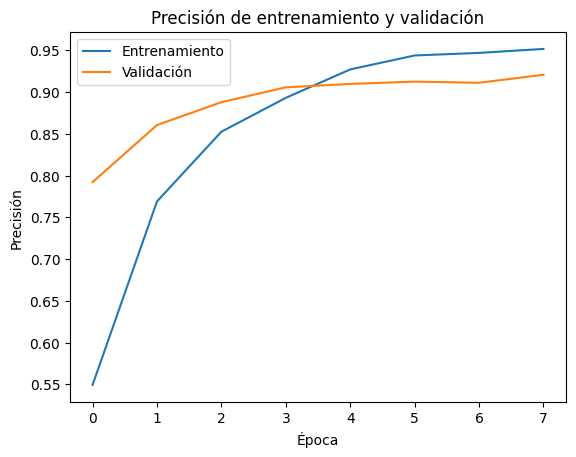

29/29 ━━━━━━━━━━━━━━━━━━━━ 5s 181ms/step - accuracy: 0.8870 - loss: 0.3676

Precisión en conjunto de prueba: 0.8961
29/29 ━━━━━━━━━━━━━━━━━━━━ 5s 170ms/step

Reporte de clasificación:
                       precision    recall  f1-score   support

               alheli       0.92      0.84      0.88       143
             nymphaea       0.95      0.87      0.91       155
   pasiflora_completa       0.98      0.97      0.98       200
     petunia_completa       0.89      0.92      0.90       135
         rosa_foetida       0.80      0.87      0.84       135
trompaleolum_completa       0.82      0.87      0.84       146

             accuracy                           0.90       914
            macro avg       0.89      0.89      0.89       914
         weighted avg       0.90      0.90      0.90       914



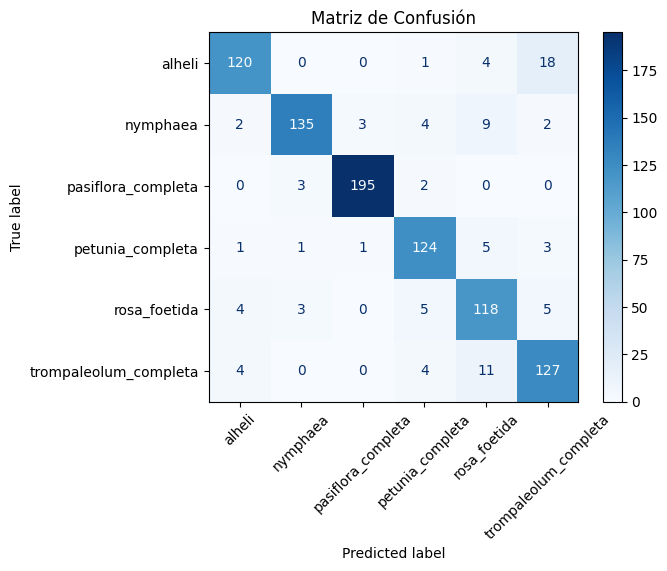

In [6]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

#parámetros iniciales
base_dir = "/content/categorias_dividido/"
batch_size = 32
img_height = 128
img_width = 128
seed = 123

#subir las carpetas de cada segmento de entrenamiento, validación y prueba
train_ds = tf.keras.utils.image_dataset_from_directory(
    base_dir + "train/",
    image_size=(img_height, img_width),
    batch_size=batch_size
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    base_dir + "val/",
    image_size=(img_height, img_width),
    batch_size=batch_size
)

test_ds = tf.keras.utils.image_dataset_from_directory(
    base_dir + "test/",
    image_size=(img_height, img_width),
    batch_size=batch_size,
    shuffle=True
)

class_names = train_ds.class_names
print("Clases:", class_names)

#optimización del pipeline
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size=AUTOTUNE)

#modelo de CNN con keras, y en tres canales
model = keras.Sequential([
    layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
    layers.Conv2D(32, 3, activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(len(class_names), activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

#EarlyStopping para que finalice cuando ya no haya mejoras en la precisión
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

#entrenamiento del modelo
history = model.fit(train_ds, validation_data=val_ds, epochs=20, callbacks=[early_stop])

#guardado del modelo en .h5
model.save("modelo_mejorado.h5")

#gráfica de  precisión
plt.plot(history.history['accuracy'], label='Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Validación')
plt.xlabel('Época')
plt.ylabel('Precisión')
plt.legend()
plt.title('Precisión de entrenamiento y validación')
plt.show()

#evaluación en los datos de test
loss, acc = model.evaluate(test_ds)
print(f"\nPrecisión en conjunto de prueba: {acc:.4f}")
#predicciones del modelo
y_pred_probs = model.predict(test_ds)
y_pred = np.argmax(y_pred_probs, axis=1)

#obtener verdaderas etiquetas
y_true = np.concatenate([y for x, y in test_ds], axis=0)

print("\nReporte de clasificación:")
print(classification_report(y_true, y_pred, target_names=class_names))

# Calcular la matriz de confusión
cm = confusion_matrix(y_true, y_pred)

# Mostrar la matriz de confusión con etiquetas de clase
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap=plt.cm.Blues, xticks_rotation=45)
plt.title("Matriz de Confusión")
plt.show()

Visualización de las predicciones hechas por el modelo CNN, se muestra la imágen, su predicción y su verdadera etiqueta.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step


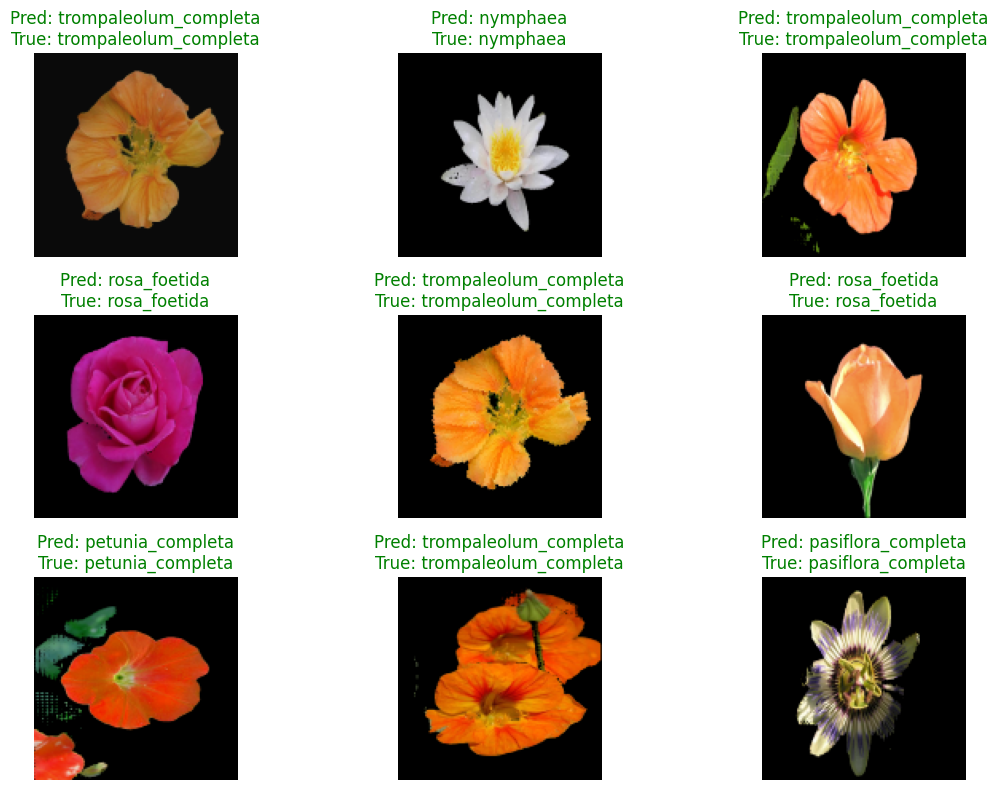

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import random

#cargar el modelo ya entrenado
model = tf.keras.models.load_model("modelo_mejorado.h5")

#obtener todas las imágenes y etiquetas del conjunto de prueba
all_images = []
all_labels = []
for images, labels in test_ds:
    all_images.extend(images)
    all_labels.extend(labels)

# 9 índices aleatorios
num_images = len(all_images)
random_indices = random.sample(range(num_images), 9)

#preparación del batch aleatorio
random_images = tf.stack([all_images[i] for i in random_indices])
random_labels = tf.convert_to_tensor([all_labels[i] for i in random_indices])

#hacer predicciones
predictions = model.predict(random_images)
predicted_classes = tf.argmax(predictions, axis=1)

#mostrar las imágenes con sus etiquetas originales y las predichas
plt.figure(figsize=(12, 8))
for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(random_images[i].numpy().astype("uint8"))
    true_label = class_names[random_labels[i]]
    predicted_label = class_names[predicted_classes[i]]
    color = "green" if predicted_label == true_label else "red"
    plt.title(f"Pred: {predicted_label}\nTrue: {true_label}", color=color)
    plt.axis("off")
plt.tight_layout()
plt.show()

